## Radon Transform

$R(\rho, \theta) = \int_{-\infty}^{+\infty} \int_{-\infty}^{+\infty} I(x, y) \, \delta(x \cos \theta + y \sin \theta - \rho) \, dx \, dy$

- $I(x, y)$ is the image being transformed.
- $\delta$ is the Dirac distribution.
- $\rho$ is the distance from the origin to the line along which the function \( I \) is integrated.
- $\theta$ is the angle between the x-axis and the normal to the line.

##### Load the necessary modules

In [ ]:
import numpy as np
from skimage.transform import rotate as skimage_rotate

##### Define Radon Transform

In [ ]:
def RT(img, nb_angles):
    if img.ndim != 2:
        raise ValueError('The input image must be 2-D')
        
    thetas = np.linspace(0, 180, nb_angles, endpoint=False)
    rotations = np.array([skimage_rotate(img, -1*theta) for theta in thetas])
    sinogram = np.array([rotation.sum(axis=0) for rotation in rotations]).T
    
    # Suivre l'exécution
    progress = (k + 1) / nb_angles * 100
    print(f'\rSSRT progress: ({progress:.2f}%)', end='')

    return sinogram

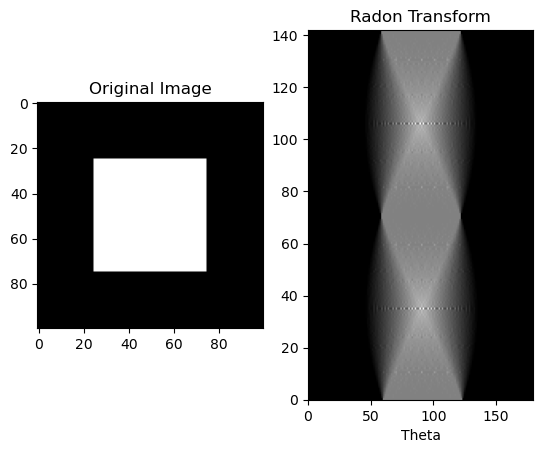

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def radon_transform(image, theta_values):
    # Initialize variables
    rows, cols = image.shape
    diag = int(np.ceil(np.sqrt(rows**2 + cols**2)))
    radon_matrix = np.zeros((len(theta_values), diag), dtype=np.float64)
    
    # Calculate mid points
    mid_row, mid_col = rows // 2, cols // 2
    
    # Loop through each angle
    for i, theta in enumerate(theta_values):
        cos_theta = np.cos(np.deg2rad(theta))
        sin_theta = np.sin(np.deg2rad(theta))
        
        # Loop through each element in the Radon matrix for the given angle
        for rho in range(-diag // 2, diag // 2):
            sum_val = 0
            
            # Loop through each pixel in the image
            for x in range(rows):
                for y in range(cols):
                    x_rotated = (x - mid_row) * cos_theta + (y - mid_col) * sin_theta
                    if np.round(x_rotated) == rho:
                        sum_val += image[x, y]
            
            radon_matrix[i, rho + diag // 2] = sum_val
            
    return radon_matrix

# Create a simple image: a white square in a black background
image = np.zeros((100, 100), dtype=np.uint8)
image[25:75, 25:75] = 255

# Define theta values
theta_values = np.arange(0, 180, 1)

# Compute Radon transform
radon_matrix = radon_transform(image, theta_values)

# Display the original image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')

# Display the Radon transform
plt.subplot(1, 2, 2)
plt.title("Radon Transform")
plt.imshow(radon_matrix, cmap='gray', extent=[0, 180, 0, radon_matrix.shape[1]], aspect='auto')
plt.xlabel("Theta")
plt.ylabel("Rho")

plt.show()
